<a href="https://colab.research.google.com/github/monclai/bootcamp_dataScience_aplicada_alura_desafios/blob/main/desafio_02/notebook/Desafio_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hipótese

Será pesquisado se na última década o índice de vacinação afetou os gastos com internação. Para isso serão utilizados os gastos com internação dos 3 estados com maior despesa com internação (São Paulo, Minas Gerais e Paraná), também serão utilizados dados referentes a cobertura da vacinação desses estados.

In [1]:
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.ticker as ticker

# Dados

Dados coletados do Datasus com informações sobre a cobertura de vacinação dos 3 estados que mais gastam com internações(São Paulo, Minas Gerais e Paraná), e dados relativos aos gastos com internações de tais estados.

Além dos dados coletados através do Datasus, foi levantado a população desses estados, tal dado foi obtido no wikipédia.



In [2]:
uri_cobertura_de_vacinacao = 'https://raw.githubusercontent.com/monclai/bootcamp_dataScience_aplicada_alura_desafios/main/desafio_02/dados/coberturas_vacinais_por_ano.csv'
uri_gasto_internacao = 'https://raw.githubusercontent.com/monclai/bootcamp_dataScience_aplicada_alura_desafios/main/desafio_02/dados/aih_aprovadas_por_ano_processamento_maiores_gastos.csv'

In [3]:
cobertura_de_vacinacao = pd.read_csv(uri_cobertura_de_vacinacao, encoding='ISO-8859-1', sep=';', decimal = ',')
gasto_internacao = pd.read_csv(uri_gasto_internacao, encoding="ISO-8859-1", sep=';')

In [4]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

In [5]:
cobertura_de_vacinacao['uf'] = cobertura_de_vacinacao['Unidade da Federação']
cobertura_de_vacinacao = cobertura_de_vacinacao.set_index('uf')
cobertura_de_vacinacao = cobertura_de_vacinacao.drop('Unidade da Federação', axis=1)
cobertura_de_vacinacao = cobertura_de_vacinacao.drop(' Total', axis = 1)
cobertura_de_vacinacao = cobertura_de_vacinacao.drop('Total', axis=0)
cobertura_de_vacinacao.index = cobertura_de_vacinacao.index.str[3:]
cobertura_de_vacinacao.index = cobertura_de_vacinacao.index.str.strip()

In [6]:
gasto_internacao['uf'] = gasto_internacao['Unidade da Federação']
gasto_internacao = gasto_internacao.set_index('uf')
gasto_internacao = gasto_internacao.drop('Unidade da Federação', axis = 1)
gasto_internacao = gasto_internacao.drop('Total', axis = 1)
gasto_internacao = gasto_internacao.drop('Total', axis = 0)
gasto_internacao.index = gasto_internacao.index.str[3:]
gasto_internacao.index = gasto_internacao.index.str.strip()

In [7]:
dados_da_populacao_io =  StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep='\t')
populacao = populacao.dropna()
populacao['populacao'] = populacao['População'].str.replace(" ", '').astype(int)
populacao['uf'] = populacao['Unidade federativa']
populacao = populacao[['populacao', 'uf']].set_index('uf')
populacao.index = populacao.index.str.strip()

In [8]:
principais_estados = populacao.loc[['Minas Gerais', 'São Paulo', 'Paraná']]

In [9]:
gasto_e_populacao = principais_estados.join(gasto_internacao)

Usando os gasto de cada estado por ano e a população de cada estado podemos saber aproximadamente o gasto por indivíduo, dessa forma obtento uma comparação mais justa entre os estados, visto que a cobertura de vacinação é calculado levando em consideração doses e indivíduos.

In [10]:
anos = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [11]:
uf = 'Minas Gerais'

for ano in anos:
  gasto_e_populacao[f'gasto_por_habitante_{ano}'] = gasto_e_populacao[ano].loc[uf] / gasto_e_populacao['populacao'].loc[uf]


In [12]:
uf = 'São Paulo'

for ano in anos:
  gasto_e_populacao[f'gasto_por_habitante_{ano}'].loc[uf] = gasto_e_populacao[ano].loc[uf] / gasto_e_populacao['populacao'].loc[uf]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
uf = 'Paraná'

for ano in anos:
  gasto_e_populacao[f'gasto_por_habitante_{ano}'].loc[uf] = gasto_e_populacao[ano].loc[uf] / gasto_e_populacao['populacao'].loc[uf]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
gasto_e_populacao = gasto_e_populacao.drop(anos, axis=1)
gasto_e_populacao = gasto_e_populacao.drop('populacao', axis=1)

In [15]:
gasto_e_populacao.columns = anos
gasto_e_populacao.columns = gasto_e_populacao.columns.astype('datetime64[ns]')

In [16]:
cobertura_de_vacinacao.columns = cobertura_de_vacinacao.columns.astype('datetime64[ns]')

In [17]:
gasto_e_populacao_aberto = gasto_e_populacao.T.reset_index().melt(id_vars=['index'], value_vars = gasto_e_populacao.T.columns)
gasto_e_populacao_aberto.columns = ['ano', 'uf', 'gasto']     

In [18]:
gasto_e_populacao_aberto['gasto'] = gasto_e_populacao_aberto['gasto'] * 100

In [19]:
cobertura_de_vacinacao = cobertura_de_vacinacao/100

In [20]:
cobertura_de_vacinacao_aberto = cobertura_de_vacinacao.T.reset_index().melt(id_vars=['index'], value_vars = cobertura_de_vacinacao.T.columns)
cobertura_de_vacinacao_aberto.columns = ['ano', 'uf', 'cobertura']

# Visualização de dados

Podemos ver que apesar da taxas de vacinação terem oscilações, tais oscilações não afetam no gasto de por atendimento, demonstrando que existe um possível controle das doenças.

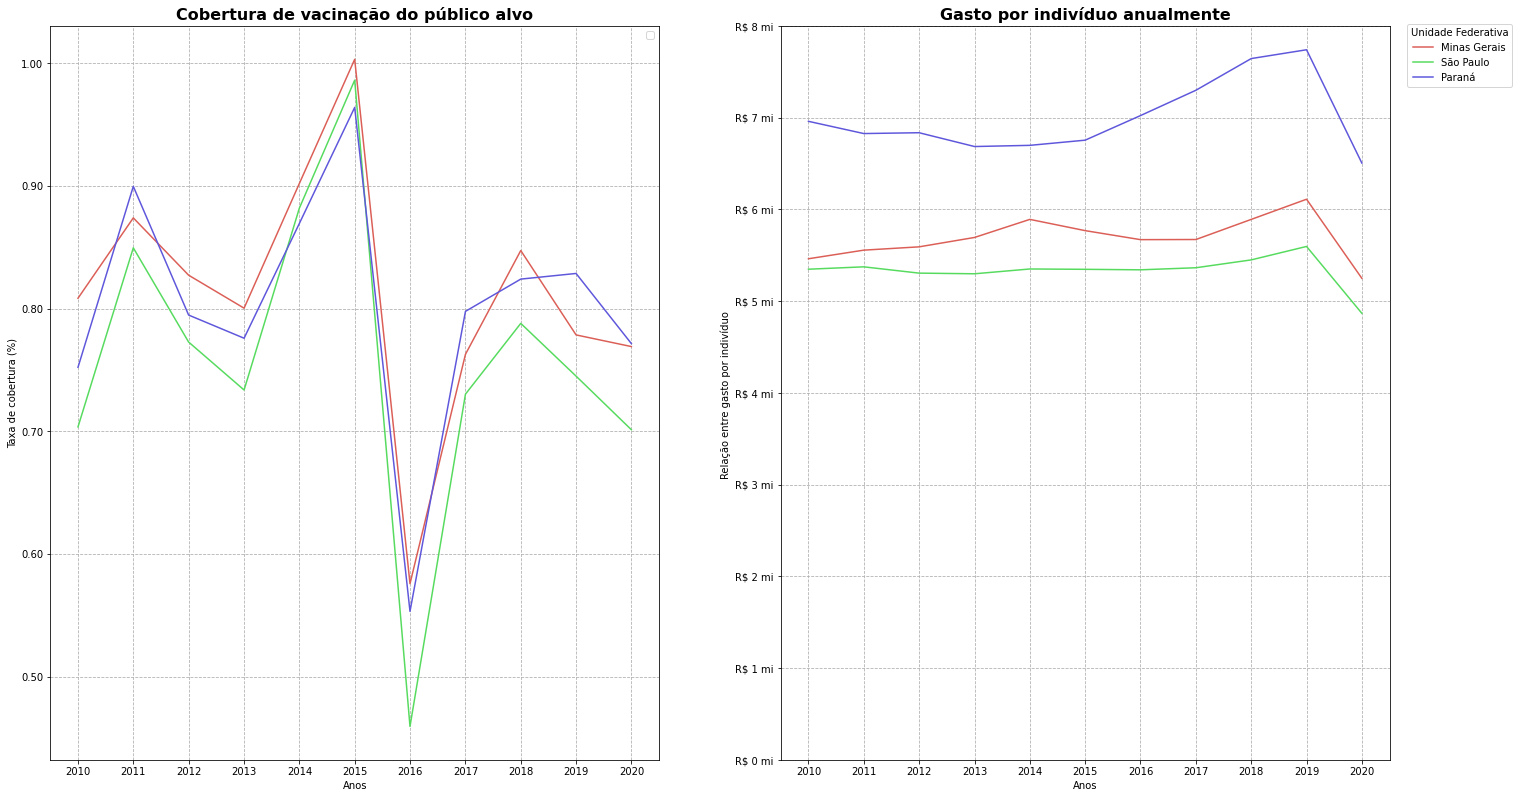

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (24, 13.5))

ax[0] = sns.lineplot(ax = ax[0], data = cobertura_de_vacinacao_aberto, x = 'ano', y = 'cobertura', hue = 'uf', palette = sns.color_palette("hls", 3))
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax[0].set_title('Cobertura de vacinação do público alvo', fontsize = 16, fontweight = 'bold')
ax[0].set(xlabel = 'Anos', ylabel = 'Taxa de cobertura (%)')
ax[0].grid(True, linestyle = '--')
ax[0].legend("")
plt.ylim(0, 1.0)


ax[1] = sns.lineplot(ax = ax[1], data=gasto_e_populacao_aberto, x='ano', y='gasto', hue='uf', palette = sns.color_palette("hls", 3))
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} mi"))
ax[1].set_title('Gasto por indivíduo anualmente', fontsize = 16, fontweight = 'bold')
ax[1].set(xlabel = 'Anos', ylabel = 'Relação entre gasto por indivíduo ')
ax[1].legend(title = 'Unidade Federativa', bbox_to_anchor = (1.02, 1.01))
plt.grid(True, linestyle = '--')
plt.ylim(0, 8)

plt.show()